# Task 1

A step ladder $ABC$, hinged at $B$, rests on a smooth horizontal floor, as shown on the figure. $AB$ = $BC$ = $2l$. The centres of gravity are at the midpoints $D$ and $E$ of the rods. The radius of gyration of each part of the ladder about the axis passing through the center of gravity is $\rho$. The distance between $B$ and the floor is $h$. At the certain moment the ladder collapses due to the rupture of a ling $FG$ between the two halves of the ladder. Neglecting the effect of friction in the hinge, determine:
1. the velocity $v_1$ of the point $B$ at the moment, when it hits the floor;
2. the velocity $v_2$ of point $B$ at the moment, when it is at a distance $\frac{h}{2}$ from the floor.

## Solution

![Image Description](./task1.jpg)

### Section 1

1. RO: rod $AB$, rod $BC$, planar motion
2. Method: Theorem of kinetic energy
3. Force analysis:
   1. $\vec{N_a}$, $\vec{N_c}$, $\vec{G_d}$, $\vec{G_e}$ along $y$-axis
4. Conditions:
   
$$
\begin{bmatrix*}
variable & initial & final\\
x_b & 0 & 0\\
y_b & h & 0\\
x_c & \sqrt{4l^2 - h^2} & \sqrt{4l^2 - h^2} + h\\
y_c & 0 & 0\\
x_a & -\sqrt{4l^2 - h^2} & -\sqrt{4l^2 - h^2} - h\\
y_a & 0 & 0
\end{bmatrix*}
$$

5. Solution:
   
   a. Kinetic Energies:
   
      $T_{AB} = 0.5 I w^2_{AB}$
      
      $T_{BC} = 0.5 I w^2_{BC}$
   
   where $I = m_{AB} l^2 + m_{AB} \rho^2$

Calculate velocity using $ICV$:

![Image Description](./task1.1.jpg)

$v_B = w_{AB}2l = w_{BC}2l$

Calcualte work done by gravity:

$A = mgh$

Put into equation: $\delta K = \sum {A}$

$T_{AB} + T_{BC} = A$

$I \frac{v_B^2}{4l^2} = mgh$

$v_B = 2l \sqrt{\frac{gh}{l^2 + \rho^2}}$

### Section 2

4. Conditions:
   
$$
\begin{bmatrix*}
variable & initial & final\\
x_b & 0 & 0\\
y_b & h & 0.5h\\
x_c & \sqrt{4l^2 - h^2} & \sqrt{4l^2 - h^2} + 0.5h\\
y_c & 0 & 0\\
x_a & -\sqrt{4l^2 - h^2} & -\sqrt{4l^2 - h^2} - 0.5h\\
y_a & 0 & 0
\end{bmatrix*}
$$

Calculate velocity using $ICV$:

$v_B = w_{AB} \sqrt{4l^2 - 0.25h^2} = w_{BC} \sqrt{4l^2 - 0.25h^2}$

Calcualte work done by gravity:

$A = 0.5mgh$

Put into equation: $\delta K = \sum {A}$

$T_{AB} + T_{BC} = A$

$I \frac{v_B^2}{\sqrt{4l^2 - 0.25h^2}} = 0.5mgh$

$v_B = 0.5 \sqrt{\frac{16ghl^2 - gh^3}{2(l^2 + \rho^2)}}$

## Answer

1. $v_B = 2l \sqrt{\frac{gh}{l^2 + \rho^2}}$
2. $v_B = 0.5 \sqrt{\frac{16ghl^2 - gh^3}{2(l^2 + \rho^2)}}$

# Task 2

![Image Description](./task2.png)

## Solution

![Image Description](./task2.1.jpg)

1. R.O: cart: rectilinear, mass: planar
2. Method: Newton-Euler
3. Force analysis: $\vec{N_{cart}}, \vec{T}, \vec{P_1}, \vec{P_2}$ are shown in the picture.
4. Kinematic analysis:
   
Cart: $x = x_A$

Mass:

$y = l cos(\phi)$

$\dot y = - l cos(\phi) \dot \phi$

$\ddot y = -l \dot \phi ^2 cos(\phi) - l \ddot \phi sin(\phi)$

$x = x_A + l sin(\phi)$

$\dot x = l \dot \phi cos(\phi) + \dot x_A$

$\ddot x = l \ddot \phi cos(\phi) - l sin(\phi)cos^2(\phi) + \ddot x_A$

Solution:


We will analyze each part, separately.

Cart: rectilinear moitoin. Newton's 2nd law:
    $\sum \vec{F} = m \vec{a}$
    
$ m_{cart} \ddot x = T sin(\phi) $

Mass:

$m_{mass}(-l sin(\phi) \dot \phi^2 + l cos(\phi)\ddot \phi + \ddot x) = -T sin(\phi)$

$-lm_{mass}(sin(\phi)\ddot \phi + cos(\phi)\dot \phi^2) = -T cos(\phi) + g m_{mass}$

3 unknowns ($T, x, \phi$), 3 equations
$$
\begin{equation}
    \begin{cases}
    m_{cart} \ddot x = T sin(\phi)\\
    m_{mass}(-l sin(\phi) \dot \phi^2 + l cos(\phi)\ddot \phi + \ddot x) = -T sin(\phi)\\
    -lm_{mass}(sin(\phi)\ddot \phi + cos(\phi)\dot \phi^2) = -T cos(\phi) + g m_{mass}
    \end{cases}
\end{equation}
$$

In [79]:

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode
from sympy import Symbol, Point2D, Point3D, Derivative, Function, Eq,cos,sin
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Polygon, Circle
from scipy.integrate import solve_ivp
from sympy.physics.mechanics import init_vprinting
init_vprinting()
from IPython.display import HTML, display

In [80]:
t = Symbol('t')
x = Function('x')(t)
phi = Function('phi')(t)
g = Symbol('g')
m_c,m_m = Symbol('m_cart'),Symbol('m_mass')
l = Symbol('l')
T = Symbol('T')
J = m_m* l**2

In [81]:
# express Eq. 1 using code
Equations = [Eq(m_c*sp.diff(x,t,2), T*sin(phi)),
            Eq(m_m*(-l*sin(phi)*sp.diff(phi,t,1)**2+l*cos(phi)*sp.diff(phi,t,2)+sp.diff(x,t,2)), -T*sin(phi)),
            Eq(-m_m*l*(sin(phi)*sp.diff(phi,t,2) + cos(phi)*sp.diff(phi,t,1)**2), -T*cos(phi)+g*m_m)
            ]
for i in range(len(Equations)):
  display(Equations[i])

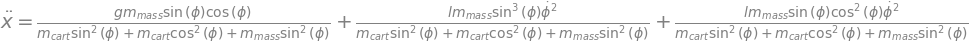

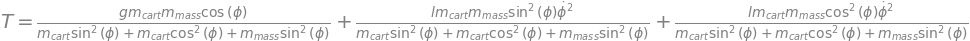

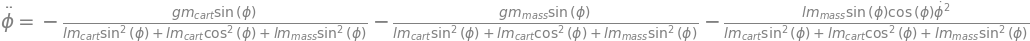

In [82]:
xxx = sp.solve(Equations,[sp.diff(x,t,2),T,sp.diff(phi,t,2)])

for i in xxx.keys():
    display(Eq(i,xxx[i]))

In [83]:
sp.classify_ode(Eq(sp.diff(x,t,2),xxx[sp.diff(x,t,2)]), x)

('nth_algebraic',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters',
 'nth_algebraic_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters_Integral')

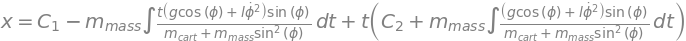

In [84]:
res = sp.dsolve(Eq(sp.diff(x,t,2),xxx[sp.diff(x,t,2)]), x, hint="nth_linear_constant_coeff_variation_of_parameters")
display(res)

Even machine could not find analytical solution! Numerical solution's code can be found in code section

## Answer

![Image Description](./_10_plot.jpg)
![Image Description](./_45_plot.jpg)
![Image Description](./_-135_plot.jpg)
![Image Description](./10_sim.gif)
![Image Description](./45_sim.gif)
![Image Description](./_-135_sim.gif)

## Code

In [76]:
def plot(time, pos, phi, vel, ang_vel, angle):

    # Plotting subplots
    plt.figure(figsize=(12, 6))

    # Plotting x(t)
    plt.subplot(221)
    plt.plot(time, pos, 'royalblue')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.title(f'Position x(t) vs Time for {angle}°')
    plt.grid(True)

    # Plotting phi(t)
    plt.subplot(222)
    plt.plot(time, phi, 'navy')
    plt.xlabel('t (s)')
    plt.ylabel('phi (rad)')
    plt.title(f'Angle phi(t) vs Time for {angle}°')
    plt.grid(True)

    # Plotting x_dot(t)
    plt.subplot(223)
    plt.plot(time, vel, 'deepskyblue')
    plt.xlabel('t (s)')
    plt.ylabel('x_dot (m/s)')
    plt.title(f'Velocity x_dot(t) vs Time for {angle}°')
    plt.grid(True)

    # Plotting phi_dot(t)
    plt.subplot(224)
    plt.plot(time, ang_vel, 'slateblue')
    plt.xlabel('t (s)')
    plt.ylabel('phi_dot (rad/s)')
    plt.title(f'Angular Velocity phi_dot(t) vs Time for {angle}°')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"_{angle}_plot.jpg")
    plt.show()

In [64]:
# Parameters
m1 = 5  # kg
m2 = 1  # kg
l = 1   # m
g = 9.81  # m/s^2

# Function defining the equations of motion
def equations(t, y):
    phi, phi_dot, x, x_dot = y
    
    phi_double_dot = (
        -g * m1 * np.sin(phi) - g * m2 * np.sin(phi) -
        l * m2 * np.sin(phi) * np.cos(phi) * phi_dot**2
    ) / (
        l * (m1 + m2 * (np.sin(phi)**2))
    )
    x_double_dot = (
        g * m2 * np.sin(phi) * np.cos(phi) +
        l * m2 * np.sin(phi)**3 * phi_dot**2 +
        l * m2 * np.sin(phi) * np.cos(phi)**2 * phi_dot**2
    ) / (
        m1 * np.sin(phi)**2 + m1 * np.cos(phi)**2 + m2 * np.sin(phi)**2
    )
    return [phi_dot, phi_double_dot, x_dot, x_double_dot]

In [66]:

test_angle = -135

# Initial conditions
phi0 = np.radians(test_angle)  # Initial angle in radians
phi_dot0 = 0      # Initial angular velocity
x0 = 0            # Initial position
x_dot0 = 0        # Initial velocity

initial_conditions = [phi0, phi_dot0, x0, x_dot0]

# Time span
t_span = np.linspace(0, 10, 100)

# Solve the differential equations
sol = solve_ivp(equations, [t_span[0], t_span[-1]], initial_conditions, t_eval=t_span)

# Extracting solutions
phi_sol = sol.y[0]
x_sol = sol.y[2]


# Function to update the animation
def update(i):
    cart.set_data([x_sol[i] - 0.5, x_sol[i] + 0.5], [0, 0])
    pole.set_data([x_sol[i], x_sol[i] + np.sin(phi_sol[i]) * l], [0, -np.cos(phi_sol[i]) * l])

# Create the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)

# Create the cart and pole objects
cart, = ax.plot([], [], 'k', lw=2)
pole, = ax.plot([], [], 'r', lw=2)

# Set up the animation
ani = FuncAnimation(fig, update, frames=len(t_span), interval=10)


# Show the animation
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Position (m)')
plt.ylabel('Height (m)')
plt.title(f'Cart-Pole System Animation for {test_angle}°')
plt.grid()
# plt.show()

display(HTML(ani.to_jshtml()))
ani.save(f"_{test_angle}_sim.gif")
plt.close(fig)

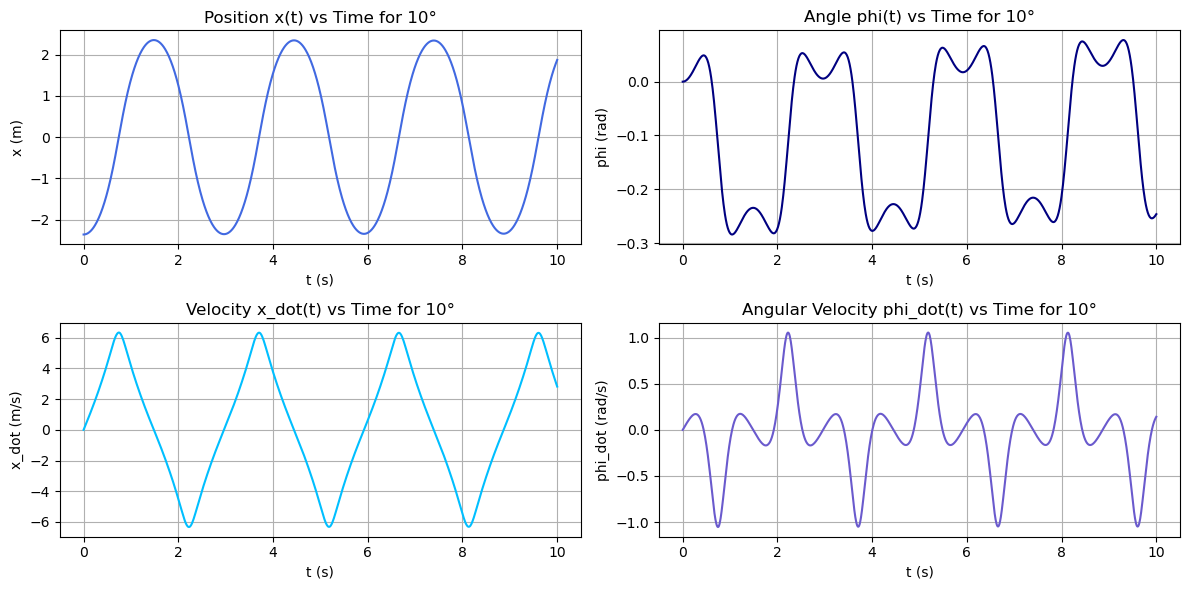

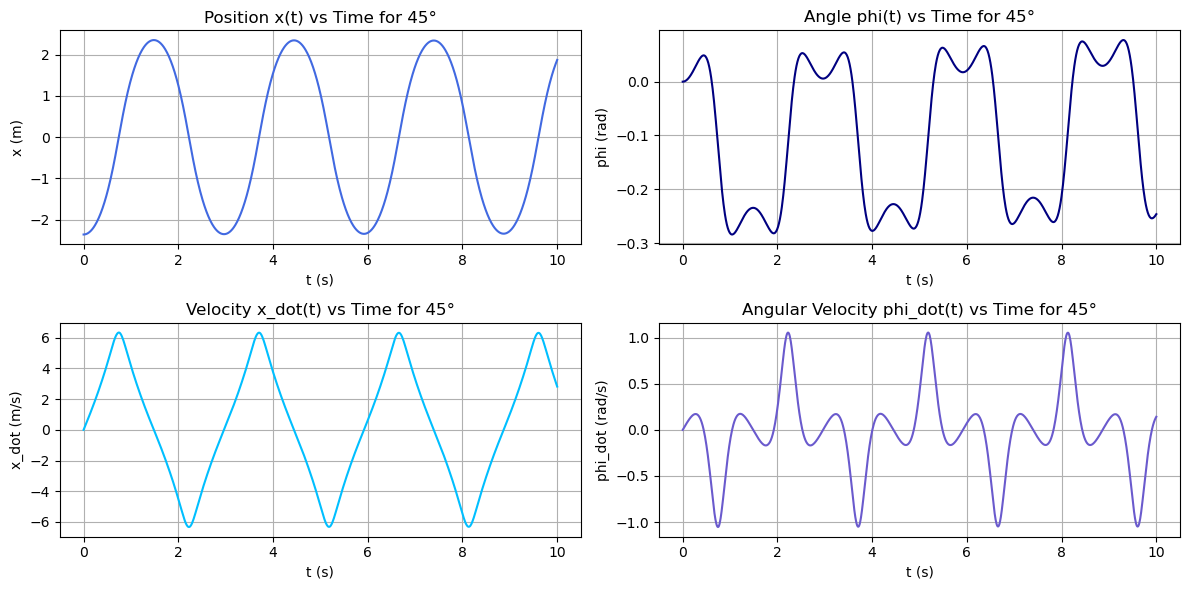

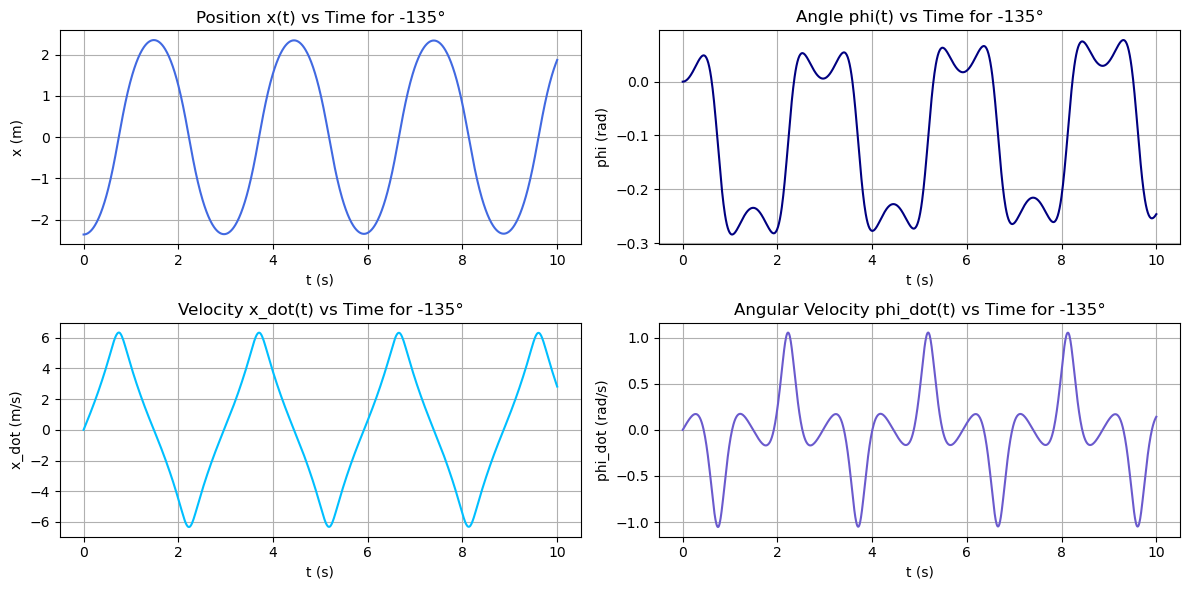

In [78]:
angles = [10, 45, -135]

for a in angles:
    # Time span
    t_span = np.linspace(0, 10, 1000)

    # Solve the differential equations
    sol = solve_ivp(equations, [t_span[0], t_span[-1]], initial_conditions, t_eval=t_span)
    plot(t_span, sol.y[0], sol.y[2], sol.y[1], sol.y[3], a)
